---

## Applying Data Analysis Cycle on *Queensland Health* waste water surveilance data

Using *Queensland Health* waste water surveilance data, identify regions where genetic material has been detected in waste water over a 6 month period. What insights could be gained from this data and how might the Queensland Government use them?

#### Data:

[Queensland wastewater surveillance for SARS-CoV-2 in 2020](https://www.data.qld.gov.au/dataset/queensland-wastewater-surveillance-for-sars-cov-2-in-2020/resource/0e7a7d67-435c-4d24-9e6f-23c28a6a8cff)


In [24]:
# import libraries for this question here
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as py
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1.1 Question

**To identify, the waste water plant sites that has frequently detected genetic material (SARS-CoV-2) over a period of 6 months, with the help of Queensland Health waste water surveilance data.  
Also, to understand the relationship between the sample being collected and samples collected detecting genetic material for each month.**   
*Reporting the above findings and providing relevant insights to my stakeholder, Queensland Government, so that necessary steps or measures are made*

### 1.2 Data

In [25]:
# Import the data
df_1 = pd.read_csv('Datas/queensland-wastewater-surveillance-for-sars-cov-2-in-2020v1.1.csv')
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sampling date    727 non-null    object 
 1   Site             727 non-null    object 
 2   Result           727 non-null    object 
 3   Site population  712 non-null    float64
 4   Notes            262 non-null    object 
dtypes: float64(1), object(4)
memory usage: 28.5+ KB
None


### Metadata

| **Column** | **Type** | **Description** |
| --- | --- | --- |
| Sampling date | timestamp | Date of wastewater sample collection |
| Site | text | Name of wastewater treatment plant  |
| Result | text | Either detected or not detected for each sample collected |
| Site population | integer | Estimated population serviced by wastewater treatment plant |
| Notes | text | Mentioning if sites have been reanalysed

### *Clean/prepare the data for analysis*

In [26]:
# As 'Notes' column is having more than half entries missing. Instead of dropping each missing rows,
# droping the whole column won't impact much on the dataset.

df_1 = df_1.drop('Notes', axis = 1)

# Variable 'Site population' has 15 missing entries; however, on close examination of the dataset all the missing entries 
# are for the 2 locations of Cannonvale i.e., Cannonvale upstream location A and location B. Intererstingly both the locations
# have shown non-detected results for genetic material. Thus, removing all the rows with N/A (missing site population) values
# won't affect the dataset and rather enhance the data quality for analysis.
 
df_1_clean = df_1.dropna(subset =['Site population'])
print(df_1_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 726
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sampling date    712 non-null    object 
 1   Site             712 non-null    object 
 2   Result           712 non-null    object 
 3   Site population  712 non-null    float64
dtypes: float64(1), object(3)
memory usage: 27.8+ KB
None


### 1.3 Analysis

Analyse the data - ensure that you at least use the required technique

In [27]:
pd.unique(df_1_clean.Site) # Site names we would be investigating upon

array(['Coombabah', 'Elanora', 'Loganholme', 'Merrimac', 'Pimpama',
       'Goodna', 'Oxley Creek', 'Bundamba', 'Carole Park', 'Fairfield',
       'Gibson Island', 'Luggage Point', 'Sandgate', 'Wacol', 'Wynnum',
       'Cairns North', 'Cairns South', 'Mackay South', 'Maroochydore',
       'Noosa', 'Cannonvale', 'Cleveland Bay', 'Pulgul', 'Bundaberg',
       'Stanthorpe', 'Warwick', 'Rockhampton North', 'Caboolture South',
       'Condon', 'Kawana', 'Mount St John', 'Nambour', 'Port Douglas',
       'Redcliffe', 'Capalaba', 'Cleveland', 'Thorneside',
       'Victoria Point', 'Maryborough'], dtype=object)

**Analysis 1**

In [28]:
# To identify those Sites that are frequently detecting genetic material and explore further.

result_data = pd.DataFrame(df_1_clean.groupby(['Result'])['Site'].value_counts())
result_data.rename(columns={'Result': 'Result', 'Site': 'Site', 'Site': 'Count'}, inplace = True)
Detected_data = result_data.loc['Detect']

(My hypothesis) -> Let's say sites where genetic material have been detected for more than 5 times from July till December
                   in 2019 are the ones that I am mostly concerned about.

In [29]:
# Filtering sites with the detection count of more than 5 from the dataset.
Detected_data.loc[Detected_data['count']>5]

,count
Site,
Goodna,11
Coombabah,10
Loganholme,9
Elanora,6
Cairns North,6
Wynnum,6
Fairfield,6


Further exploring each of the above sites detecting more than 5 times in 6 months with respect to the date of sample collection. 

In [53]:
# For each site investigating the first and last date of genetic material detection:
test = df_1_clean[df_1_clean['Result'] == 'Detect']
test_1 = test[test['Site'].isin(['Goodna','Coombabah','Loganholme','Cairns North','Elanora','Fairfield','Wynnum'])]
site_grouped = test_1.groupby(['Site'], sort = False)

# Using for loop to print out grouped items for each site.
for name, group in site_grouped:
        print()
        print("                                          "+ name[0] + "\n")
        print(group.drop(['Site', 'Site population'], axis = 1))
        Count = group['Result'].count()
        print()
        print('Total detected count: ', Count)        


                                          Elanora

    Sampling date  Result
1      22/07/2020  Detect
19      3/08/2020  Detect
36      5/08/2020  Detect
206    23/09/2020  Detect
582    14/12/2020  Detect
710    30/12/2020  Detect

Total detected count:  6

                                          Loganholme

    Sampling date  Result
2      22/07/2020  Detect
7      29/07/2020  Detect
12     31/07/2020  Detect
23      3/08/2020  Detect
43      6/08/2020  Detect
52      9/08/2020  Detect
64     11/08/2020  Detect
118    26/08/2020  Detect
696    29/12/2020  Detect

Total detected count:  9

                                          Coombabah

    Sampling date  Result
5      29/07/2020  Detect
18      3/08/2020  Detect
35      5/08/2020  Detect
163     9/09/2020  Detect
182    15/09/2020  Detect
224    29/09/2020  Detect
348     2/11/2020  Detect
387    10/11/2020  Detect
505     2/12/2020  Detect
561     9/12/2020  Detect

Total detected count:  10

                               

*Insights*

1) Out of 39 sites 6 sites i.e., Goodna (11), Coombabah(10), Loganholme(9), Cairns North(6), Elanora(6), Fairfield(6), Wynnum(6) are the sites government should be concerned more. (Based on my hypothesis)

2) Site 'Cairns North' didn't detect anything for first 4 months; however, detected 6 times in last 2 months. 

**Analysis 2**

In [54]:
# Now investigating the results that have detected genetic material each month (July till December in 2020):

Test = df_1_clean.filter(items = ['Sampling date','Site','Result']) # Selecting 3 columns ('Sampling date', 'Site' & 'Result')
# Converting 'Sampling date' data type from object to datetime format
Test['Sampling date'] = pd.to_datetime(Test['Sampling date'], dayfirst = True) 
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 726
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sampling date  712 non-null    datetime64[ns]
 1   Site           712 non-null    object        
 2   Result         712 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 22.2+ KB
None


*Below is the summary of monthly analysis of collected samples and detected samples from JULY till DECEMBER in 2020*

In [55]:
                                                # JULY
    
July = Test[Test['Sampling date'].dt.strftime('%Y-%m') == '2020-07']   # Visualisation
Detected_samples_Jul = July.loc[July['Result'] == 'Detect'] # Detected samples in August  VIZ
Detected_count_Jul = Detected_samples_Jul['Result'].count() # Detected samples count      
Samples_coll_Jul = July['Sampling date'].count() # To count number of sampling done in August
print('                                  JULY')
print('')
print(Detected_samples_Jul)
print('')
print("Total sample collection done in the month of July is " + str(Samples_coll_Jul) +
    " out of which " + str(Detected_count_Jul) + " samples detected genetic material(SARS-CoV-2)")
print('\n')

                                              
                                               # AUGUST
    
August = Test[Test['Sampling date'].dt.strftime('%Y-%m') == '2020-08']
Samples_coll_Aug = August['Sampling date'].count() # To count number of sampling done in August
Detected_samples_Aug = August.loc[August['Result'] == 'Detect'] # Detected samples in August
Detected_count_Aug = Detected_samples_Aug['Result'].count() # Detected samples count
print('                                  AUGUST')
print('')
print(Detected_samples_Aug)
print('')
print("Total sample collection done in the month of August is " + str(Samples_coll_Aug) +
    " out of which " + str(Detected_count_Aug) + " samples detected genetic material(SARS-CoV-2)")
print('\n')

                                                
                                               # SEPTEMBER
    
September = Test[Test['Sampling date'].dt.strftime('%Y-%m') == '2020-09']
Samples_coll_Sep = September['Sampling date'].count() # To count number of sampling done in August
Detected_samples_Sep = September.loc[September['Result'] == 'Detect'] # Detected samples in August
Detected_count_Sep = Detected_samples_Sep['Result'].count() # Detected samples count
print('                                  SEPTEMBER')
print('')
print(Detected_samples_Sep)
print('')
print("Total sample collection done in the month of September is " + str(Samples_coll_Sep) +
      " out of which " + str(Detected_count_Sep) + " samples detected genetic material(SARS-CoV-2)")
print('\n')


                                              # October
    
October = Test[Test['Sampling date'].dt.strftime('%Y-%m') == '2020-10']
Samples_coll_Oct = October['Sampling date'].count() # To count number of sampling done in August
Detected_samples_Oct = October.loc[October['Result'] == 'Detect'] # Detected samples in August
Detected_count_Oct = Detected_samples_Oct['Result'].count() # Detected samples count
print('                                  OCTOBER')
print('')
print(Detected_samples_Oct)
print('')
print("Total sample collection done in the month of October is " + str(Samples_coll_Oct) +
      " out of which " + str(Detected_count_Oct) + " samples detected genetic material(SARS-CoV-2)")
print('\n')


                                              # November
    
November = Test[Test['Sampling date'].dt.strftime('%Y-%m') == '2020-11']
Samples_coll_Nov = November['Sampling date'].count() # To count number of sampling done in August
Detected_samples_Nov = November.loc[November['Result'] == 'Detect'] # Detected samples in August
Detected_count_Nov = Detected_samples_Nov['Result'].count() # Detected samples count
print('                                  NOVEMBER')
print('')
print(Detected_samples_Nov)
print('')
print("Total sample collection done in the month of November is " + str(Samples_coll_Nov) +
      " out of which " + str(Detected_count_Nov) + " samples detected genetic material(SARS-CoV-2)")
print('\n')


                                              # December
    
December = Test[Test['Sampling date'].dt.strftime('%Y-%m') == '2020-12']
Samples_coll_Dec = December['Sampling date'].count() # To count number of sampling done in August
Detected_samples_Dec = December.loc[December['Result'] == 'Detect'] # Detected samples in August
Detected_count_Dec = Detected_samples_Dec['Result'].count() # Detected samples count
print('                                  DECEMBER')
print('')
print(Detected_samples_Dec)
print('')
print("Total sample collection done in the month of December is " + str(Samples_coll_Dec) +
      " out of which " + str(Detected_count_Dec) + " samples detected genetic material(SARS-CoV-2)")


                                  JULY

   Sampling date        Site  Result
1     2020-07-22     Elanora  Detect
2     2020-07-22  Loganholme  Detect
4     2020-07-22     Pimpama  Detect
5     2020-07-29   Coombabah  Detect
7     2020-07-29  Loganholme  Detect
8     2020-07-29    Merrimac  Detect
11    2020-07-31      Goodna  Detect
12    2020-07-31  Loganholme  Detect

Total sample collection done in the month of July is 14 out of which 8 samples detected genetic material(SARS-CoV-2)


                                  AUGUST

    Sampling date           Site  Result
17     2020-08-03    Carole Park  Detect
18     2020-08-03      Coombabah  Detect
19     2020-08-03        Elanora  Detect
23     2020-08-03     Loganholme  Detect
24     2020-08-03  Luggage Point  Detect
25     2020-08-03       Merrimac  Detect
29     2020-08-03          Wacol  Detect
32     2020-08-04      Fairfield  Detect
35     2020-08-05      Coombabah  Detect
36     2020-08-05        Elanora  Detect
38     2020-08

In [56]:
# Creating a dictionary to store the count record of every collected samples in a perticular month 
Sampling_dates_dictionary = {'Jul':Samples_coll_Jul, 'Aug':Samples_coll_Aug, 'Sep':Samples_coll_Sep, 
                             'Oct':Samples_coll_Oct,'Nov': Samples_coll_Nov, 'Dec': Samples_coll_Dec}

# Creating a dataframe for collected samples count from the sampling_dates_dictionary
Sampling_dates_df = pd.DataFrame(list(Sampling_dates_dictionary.items()),columns = ['Months','Sample_count']) 
Sampling_dates_dictionary

{'Jul': 14, 'Aug': 119, 'Sep': 104, 'Oct': 104, 'Nov': 124, 'Dec': 247}

In [57]:
# Now creating a dictionary to store the count record of detected samples in a perticular month 
Detected_dates_dictionary = {'Jul':Detected_count_Jul, 'Aug':Detected_count_Aug, 'Sep':Detected_count_Sep, 
                             'Oct':Detected_count_Oct,'Nov': Detected_count_Nov, 'Dec': Detected_count_Dec}

# Similarly creating another dataframe for detected samples count from the detected_dates_dictionary
Detected_dates_df = pd.DataFrame(list(Detected_dates_dictionary.items()),columns = ['Months','Detect_count'])
Detected_dates_dictionary

{'Jul': 8, 'Aug': 35, 'Sep': 23, 'Oct': 8, 'Nov': 7, 'Dec': 29}

In [58]:
print('***************************')
print(Sampling_dates_df)
print()
print('***************************')
print(Detected_dates_df)

***************************
  Months  Sample_count
0    Jul            14
1    Aug           119
2    Sep           104
3    Oct           104
4    Nov           124
5    Dec           247

***************************
  Months  Detect_count
0    Jul             8
1    Aug            35
2    Sep            23
3    Oct             8
4    Nov             7
5    Dec            29


**Analysis 3**

In [87]:
# Examining the tables having monthly Sample_count and Detect_count and finding any relation between the 2.
months = list(Sampling_dates_df.Months)
Sampling_count = list(Sampling_dates_df.Sample_count)
Detect_count = list(Detected_dates_df.Detect_count)

Sampling_dates_df['Detect_count'] = Detect_count
Data_count_summary = Sampling_dates_df
print(Data_count_summary)
Data_count_summary = Data_count_summary[['Sample_count','Detect_count']]

  Months  Sample_count  Detect_count
0    Jul            14             8
1    Aug           119            35
2    Sep           104            23
3    Oct           104             8
4    Nov           124             7
5    Dec           247            29


In [88]:
# Looking at the relationship between Sample_count data and Detected_count data
Correlation_data = Data_count_summary.corr()
Correlation_data

,Sample_count,Detect_count
Sample_count,1.000000,0.540103
Detect_count,0.540103,1.000000


From the above data on correlation between Sample_count and Detect_count we can say, both the variables are moderately correlated

### 1.4 Visualisation

*Visualising the results*

**Visualization 1**

In [61]:
# Cleaning and formatting the dataset for the monthly visualization of detection count
df_1_clean['Result_enc'] = df_1_clean.Result.map({"Non-detect": 0, "Detect": 1})
df_1_clean['Sampling date'] = pd.to_datetime(Test['Sampling date'], dayfirst = True)
df_1_clean['Month'] = df_1_clean['Sampling date'].dt.month
Viz_1_df = df_1_clean.drop(['Sampling date','Result', 'Site population'], axis='columns')
Viz_1_g = Viz_1_df.groupby(['Site', 'Month'], sort = False)['Result_enc'].sum()
Viz1_df = Viz_1_g.reset_index()

# Assigning derived dataframe with relevant columns for viz to the sites with high detection count
Goodna = Viz1_df[Viz1_df['Site']=='Goodna']
Coombabah = Viz1_df[Viz1_df['Site']=='Coombabah']
Loganholme = Viz1_df[Viz1_df['Site']=='Loganholme']
Cairns_North = Viz1_df[Viz1_df['Site']=='Cairns North']
Elanora = Viz1_df[Viz1_df['Site']=='Elanora']
Fairfield = Viz1_df[Viz1_df['Site']=='Fairfield']
Wynnum = Viz1_df[Viz1_df['Site']=='Wynnum']

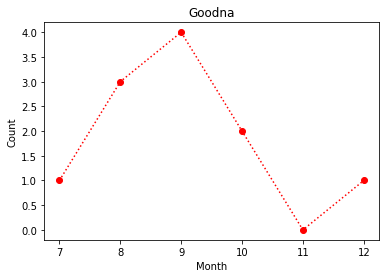

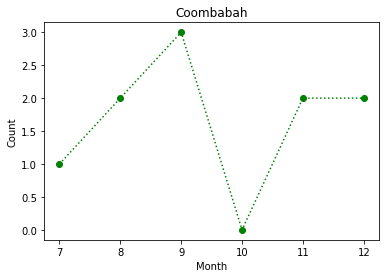

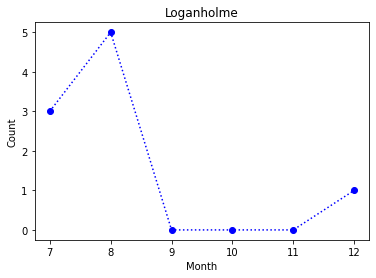

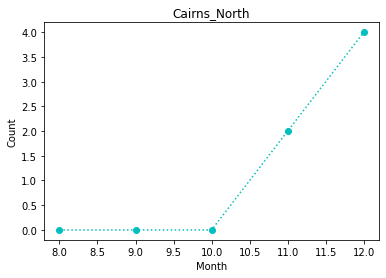

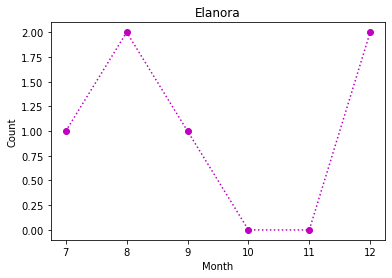

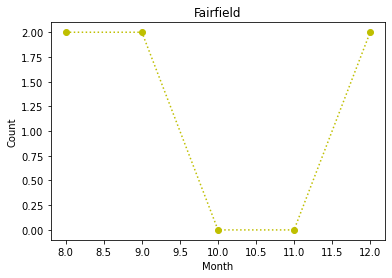

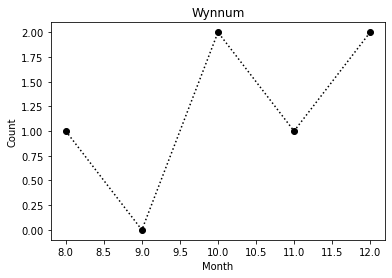

In [17]:
# Create axis and plot labels for each site that has highest frequecy of detection count

py.title("Goodna")
py.xlabel("Month")
py.ylabel("Count")
x1 = Goodna['Month']
y1 = Goodna['Result_enc']
py.plot(x1, y1, 'o:r')
py.show()


py.title("Coombabah")
py.xlabel("Month")
py.ylabel("Count")
x2 = Coombabah['Month']
y2 = Coombabah['Result_enc']
py.plot(x2, y2, 'o:g')
py.show()


py.title("Loganholme")
py.xlabel("Month")
py.ylabel("Count")
x3 = Loganholme['Month']
y3 = Loganholme['Result_enc']
py.plot(x3, y3, 'o:b')
py.show()

py.title("Cairns_North")
py.xlabel("Month")
py.ylabel("Count")
x4 = Cairns_North['Month']
y4 = Cairns_North['Result_enc']
py.plot(x4, y4, 'o:c')
py.show()

py.title("Elanora")
py.xlabel("Month")
py.ylabel("Count")
x5 = Elanora['Month']
y5 = Elanora['Result_enc']
py.plot(x5, y5, 'o:m')
py.show()

py.title("Fairfield")
py.xlabel("Month")
py.ylabel("Count")
x6 = Fairfield['Month']
y6 = Fairfield['Result_enc']
py.plot(x6, y6, 'o:y')
py.show()

py.title("Wynnum")
py.xlabel("Month")
py.ylabel("Count")
x7 = Wynnum['Month']
y7 = Wynnum['Result_enc']
py.plot(x7, y7, 'o:k')
py.show()

**Visualization 2**

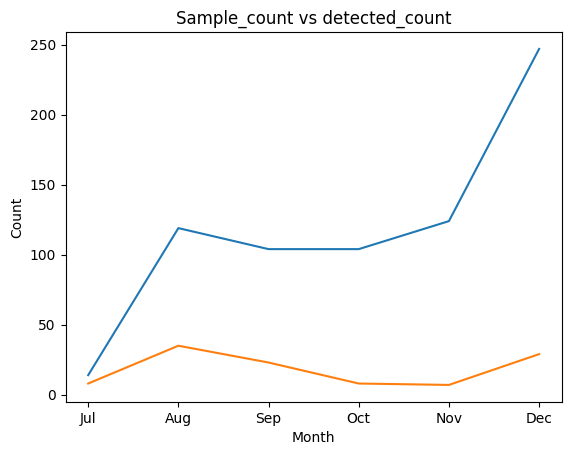

In [62]:
# The line graph visualization is depicting the monthly count of both the sample collection and detection
py.title("Sample_count vs detected_count")
py.xlabel("Month")
py.ylabel("Count")

x1 = Data_count_summary['Months']
y1 = Data_count_summary['Sample_count']
x2 = Data_count_summary['Months']
y2 = Data_count_summary['Detect_count']

py.plot(x1, y1, x2, y2)
py.show()

**Visualization 3**

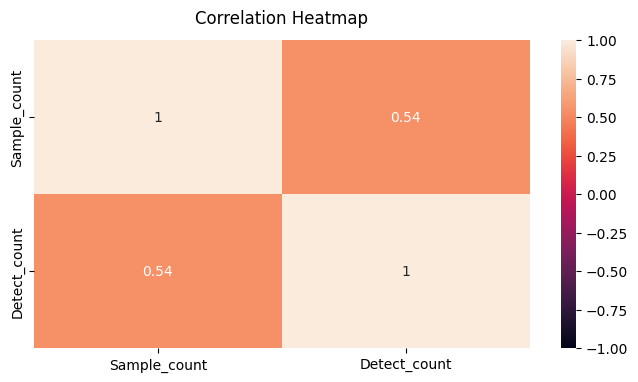

In [89]:
# Displaying the heat map viz for the correlation coefficient found in the 3rd analysis

py.figure(figsize=(8, 4)) # Increase the size of the heatmap.
heatmap = sns.heatmap(Correlation_data , vmin= -1, vmax=1, annot=True) # Set the range of values on the colormap from -1 to 1
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);  # Give a title to the heatmap.

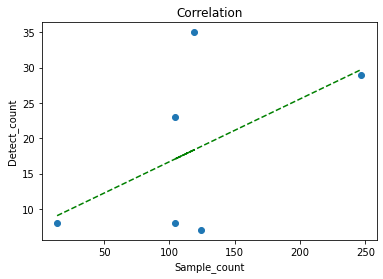

In [20]:
# A better way of looking at the correlation between the variables, visually, is a scatter plot 
X = Data_count_summary['Sample_count']
Y = Data_count_summary['Detect_count']
py.scatter(X, Y)
py.title('Correlation')
py.xlabel('Sample_count')
py.ylabel('Detect_count')
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
py.plot(X,p(X),"g--")
py.show()

### 1.5 Insight

Based on the analysis and corresponding visualization done on the Queensland Health waste water surveilance dataset, I have come up with few insights which needs to be addressed to my stakeholder,i.e., the Queensland govt.
My findings are as follows:

1) The waste water plan sites that has detected more than 5 times for genetic material (SARS) are ones that needs to be evaluated for reanalysis with utmost care.

2) During the analysis for monthly detection count it was found that many sites weren't analysed at some reasonable frequecy of sampling count.

3) As we found that the sampling frequency was having a moderate relationship with the detection count for the collected samples (about 0.5 correlation), it is highly recommended to increase the overall sample collection count in future to get better results of genetic material detection